In [4]:
dataset = "/Users/Licious/project/unipd/hda_dataset/audio"
pre_emphasis = 0.97
frame_size = 0.025
frame_stride = 0.01

In [5]:
import numpy
import scipy.io.wavfile

from scipy.fftpack import dct

sample_rate, signal = scipy.io.wavfile.read(f'{dataset}/1-137-A-32.wav')  # File assumed to be in the same directory
signal = signal[0:int(3.5 * sample_rate)]  # Keep the first 3.5 seconds





In [7]:
emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

In [10]:
frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
signal_length = len(emphasized_signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))
num_frames = int(numpy.ceil(float(numpy.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

pad_signal_length = num_frames * frame_step + frame_length
z = numpy.zeros((pad_signal_length - signal_length))
pad_signal = numpy.append(emphasized_signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

indices = numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)) + numpy.tile(numpy.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(numpy.int32, copy=False)]

In [11]:
frames *= numpy.hamming(frame_length)




In [13]:
NFFT = 512
mag_frames = numpy.absolute(numpy.fft.rfft(frames, NFFT))  # Magnitude of the FFT
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum

In [14]:
nfilt = 40
low_freq_mel = 0
high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)

fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
filter_banks = numpy.dot(pow_frames, fbank.T)
filter_banks = numpy.where(filter_banks == 0, numpy.finfo(float).eps, filter_banks)  # Numerical Stability
filter_banks = 20 * numpy.log10(filter_banks)  # dB

In [18]:
len(filter_banks)

348

# Visualize data

In [59]:
import wave
import numpy as np


def read_data(file_name):
    wav_obj = wave.open(f"{dataset}/{file_name}", "rb")
    sample_freq = wav_obj.getframerate()
    n_samples = wav_obj.getnframes()
    t_audio = n_samples / sample_freq
    n_channels = wav_obj.getnchannels()
    signal_wave = wav_obj.readframes(n_samples)
    signal_array = np.frombuffer(signal_wave, dtype=np.int16)
    signal_array
    times = np.linspace(0, n_samples / sample_freq, num=n_samples)
    return t_audio, sample_freq, signal_array, times

In [26]:
times = np.linspace(0, n_samples/sample_freq, num=n_samples)

In [56]:
import matplotlib.pyplot as plt
def visulize_signal(signal_array,t_audio,times, file, type):
    plt.figure(figsize=(15, 5))
    plt.plot(times, signal_array)
    plt.title(file+type)
    plt.ylabel('Signal Value')
    plt.xlabel('Time (s)')
    plt.xlim(0, t_audio)
    plt.show()



In [69]:
import librosa
from IPython.display import Audio
def play_sound(file_name):
    y, sr = librosa.load(f'{dataset}/{file_name}')
    Audio(data=y, rate=sr)

In [78]:
def visulize_spg(signal_array,t_audio,sample_freq, type):
    plt.figure(figsize=(15, 5))
    plt.specgram(signal_array,scale="dB", Fs=sample_freq, vmin=-20, vmax=50)
    plt.title(type)
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.xlim(0, t_audio)
    plt.colorbar()
    plt.show()

In [29]:
signal_array.k

array([292, 293, 290, ..., 112, 126, 126], dtype=int16)

In [2]:
import librosa

In [87]:
librosa.feature.mfcc(y=y, sr=signal)

TypeError: only size-1 arrays can be converted to Python scalars

In [12]:
y, sr = librosa.load(f'{dataset}/1-137-A-32.wav')

In [94]:
librosa.feature.mfcc(y=y, sr=sr, n_mfcc=12)[0]

array([-434.814  , -454.82468, -279.37823, -220.4232 , -281.07327,
       -478.8393 , -564.8019 , -621.0387 , -655.8582 , -664.2216 ,
       -673.13715, -509.3116 , -418.26605, -441.1945 , -587.38556,
       -640.99506, -673.803  , -675.1189 , -674.96716, -675.1732 ,
       -677.4902 , -676.1549 , -674.1295 , -676.25244, -679.23175,
       -677.6847 , -678.2541 , -675.9602 , -675.7243 , -672.48083,
       -677.2976 , -679.941  , -678.70795, -675.03503, -676.473  ,
       -675.108  , -671.71423, -457.10266, -226.40453, -188.87405,
       -280.6516 , -378.86478, -212.99908, -149.53276, -203.85767,
       -414.33704, -404.80176, -371.45847, -383.57587, -258.81363,
       -241.81343, -336.58295, -455.75766, -419.13217, -355.1523 ,
       -278.8713 , -272.95197, -328.49796, -338.57852, -388.26813,
       -479.61917, -591.14935, -577.13885, -474.96338, -397.30954,
       -337.97702, -328.71515, -339.03668, -360.58957, -410.47498,
       -405.43353, -463.66727, -309.28384, -227.25108, -267.09

In [ ]:
hop_length = 512
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, hop_length=hop_length)

plt.figure(figsize=(12,8))
for i in range(1,14):
    plt.plot(tempogram[i], label=i)
plt.legend()
plt.title("Tempogram")
plt.show()


In [24]:
sr

22050

In [27]:
librosa.stream(f'{dataset}/1-137-A-32.wav',block_length=256,
                      frame_length=4096,
                      hop_length=1024)

<generator object stream at 0x28596c0b0>

In [32]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr)

In [35]:
tempo = librosa.feature.tempo(onset_envelope=onset_env, sr=sr)
tempo

array([107.66601562])

## Visualize different modules

In [37]:
# Read Meta
import pandas as pd
meta = pd.read_csv("/Users/Licious/project/unipd/hda_dataset/meta/esc50.csv")
meta

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
...,...,...,...,...,...,...,...
1995,5-263831-B-6.wav,5,6,hen,False,263831,B
1996,5-263902-A-36.wav,5,36,vacuum_cleaner,False,263902,A
1997,5-51149-A-25.wav,5,25,footsteps,False,51149,A
1998,5-61635-A-8.wav,5,8,sheep,False,61635,A


In [75]:
sample_data = meta.groupby("category").sample(n=1, random_state=1)
# sample_data = meta[meta["category"]=="dog"]

In [ ]:
for index, row in sample_data.iterrows(): 
    play_sound(row["filename"])   
    t_audio,sample_freq,signal_array,times = read_data(row["filename"])
    visulize_signal(signal_array, t_audio,times, row["filename"],row["category"])
    visulize_spg(signal_array, t_audio, sample_freq,row["category"])

In [111]:
y, sr = librosa.load(f'{dataset}/1-137-A-32.wav')

onset_env = librosa.onset.onset_strength(y=y, sr=sr)

pulse = librosa.beat.plp(onset_envelope=onset_env, sr=sr)

# Or compute pulse with an alternate prior, like log-normal

import scipy.stats

prior = scipy.stats.lognorm(loc=np.log(120), scale=120, s=1)

pulse_lognorm = librosa.beat.plp(onset_envelope=onset_env, sr=sr,

                                 prior=prior)

melspec = librosa.feature.melspectrogram(y=y, sr=sr)

/Users/Licious/project/DataPlatform/pydev/lib/python3.9/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=384 is too large for input signal of length=216
  warnings.warn(


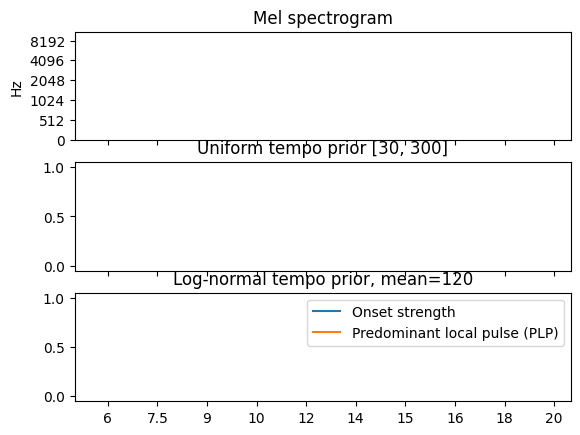

In [112]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, sharex=True)

librosa.display.specshow(librosa.power_to_db(melspec,

                                             ref=np.max),

                         x_axis='time', y_axis='mel', ax=ax[0])

ax[0].set(title='Mel spectrogram')

ax[0].label_outer()

ax[1].plot(librosa.times_like(onset_env),

         librosa.util.normalize(onset_env),

         label='Onset strength')

ax[1].plot(librosa.times_like(pulse),

         librosa.util.normalize(pulse),

         label='Predominant local pulse (PLP)')

ax[1].set(title='Uniform tempo prior [30, 300]')

ax[1].label_outer()

ax[2].plot(librosa.times_like(onset_env),

         librosa.util.normalize(onset_env),

         label='Onset strength')

ax[2].plot(librosa.times_like(pulse_lognorm),

         librosa.util.normalize(pulse_lognorm),

         label='Predominant local pulse (PLP)')

ax[2].set(title='Log-normal tempo prior, mean=120', xlim=[5, 20])

ax[2].legend()

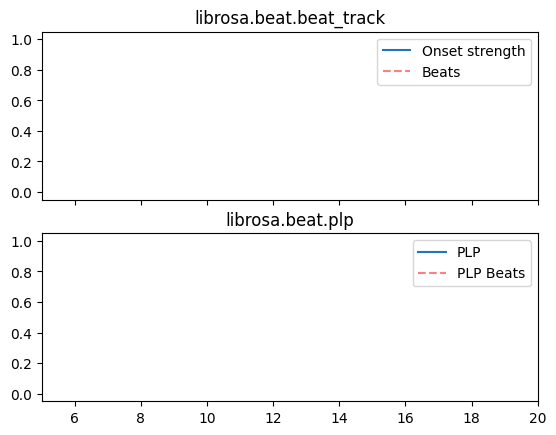

In [113]:
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env)

beats_plp = np.flatnonzero(librosa.util.localmax(pulse))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

times = librosa.times_like(onset_env, sr=sr)

ax[0].plot(times, librosa.util.normalize(onset_env),

         label='Onset strength')

ax[0].vlines(times[beats], 0, 1, alpha=0.5, color='r',

           linestyle='--', label='Beats')

ax[0].legend()

ax[0].set(title='librosa.beat.beat_track')

ax[0].label_outer()

# Limit the plot to a 15-second window

times = librosa.times_like(pulse, sr=sr)

ax[1].plot(times, librosa.util.normalize(pulse),

         label='PLP')

ax[1].vlines(times[beats_plp], 0, 1, alpha=0.5, color='r',

           linestyle='--', label='PLP Beats')

ax[1].legend()

ax[1].set(title='librosa.beat.plp', xlim=[5, 20])

ax[1].xaxis.set_major_formatter(librosa.display.TimeFormatter())

In [105]:
y, sr = librosa.load(f'{dataset}/1-137-A-32.wav')
pp=librosa.beat.plp(y=y,sr=sr)

/Users/Licious/project/DataPlatform/pydev/lib/python3.9/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=384 is too large for input signal of length=216
  warnings.warn(


In [109]:
pp

array([0.0000000e+00, 0.0000000e+00, 4.0638825e-01, 8.2035327e-01,
       1.0000000e+00, 8.8656354e-01, 5.1294798e-01, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 7.1210749e-02, 4.9333546e-01, 7.6421309e-01,
       8.2739443e-01, 6.8347585e-01, 3.8143796e-01, 5.8939378e-04,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 2.8615645e-01, 6.3855815e-01,
       8.3845514e-01, 8.2042128e-01, 5.7482105e-01, 1.5760130e-01,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 4.0256190e-01, 7.7596742e-01,
       9.2387283e-01, 8.1022167e-01, 4.7627920e-01, 2.4172112e-02,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 3.3916569e-01, 6.3409799e-01,
       7.7000958e-01, 7.1762365e-01, 4.8953515e-01, 1.3773818e-01,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

ValueError: x and y must have same first dimension, but have shapes (220500,) and (216,)

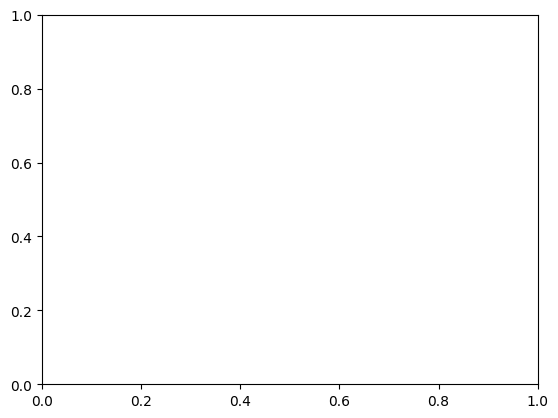

In [110]:
plt.plot(times,pp)

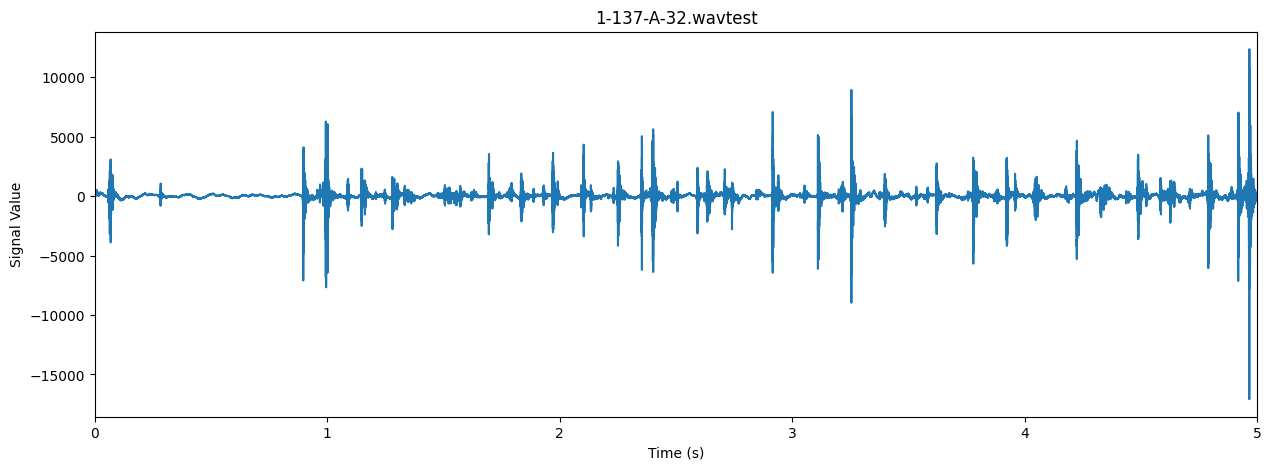

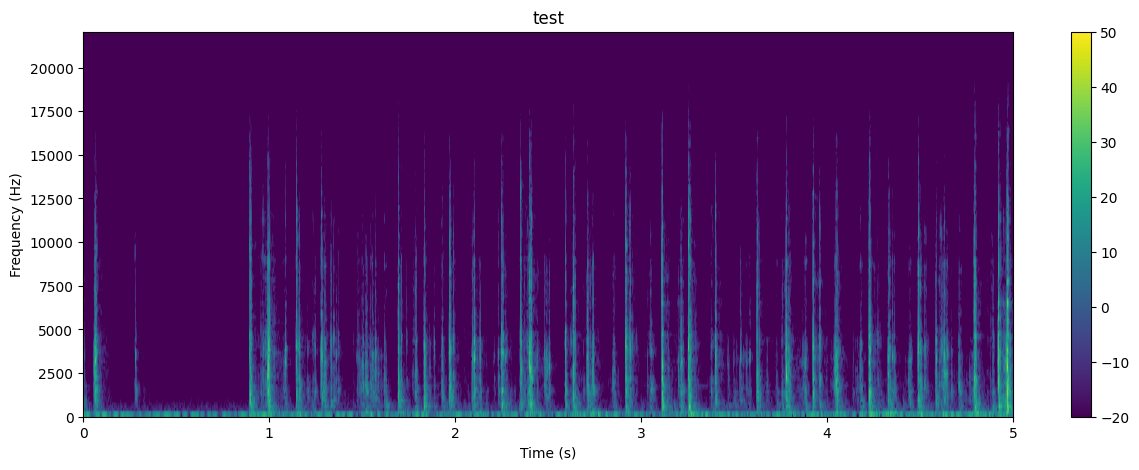

In [107]:
t_audio,sample_freq,signal_array,times = read_data('1-137-A-32.wav')
visulize_signal(signal_array, t_audio,times, '1-137-A-32.wav','test')
visulize_spg(signal_array, t_audio, sample_freq,'test')

In [117]:
import librosa
import numpy as np

def extract_features(file_path):
    # Load audio file
    y, sr = librosa.load(file_path, sr=None)

    # Extract MFCCs (Mel-Frequency Cepstral Coefficients)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # Extract Chroma feature
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    # Extract Spectral Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

    # Calculate statistical features (mean and standard deviation) for each feature
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_std = np.std(mfccs, axis=1)

    chroma_mean = np.mean(chroma, axis=1)
    chroma_std = np.std(chroma, axis=1)

    spectral_contrast_mean = np.mean(spectral_contrast, axis=1)
    spectral_contrast_std = np.std(spectral_contrast, axis=1)

    # Concatenate all features into a single feature vector
    features = np.concatenate([mfccs_mean, mfccs_std, chroma_mean, chroma_std, spectral_contrast_mean, spectral_contrast_std])

    return features

# Example usage
file_path = dataset+'/2-70052-B-42.wav'
audio_features = extract_features(file_path)
print("Extracted features shape:", audio_features.shape)
print("Extracted features:", audio_features)


Extracted features shape: (64,)
Extracted features: [-2.38503098e+02  1.15424637e+02 -7.13091888e+01 -1.87318401e+01
 -1.73582401e+01 -3.27497220e+00  9.45648611e-01  1.31539640e+01
  1.23946238e+01  2.07887578e+00 -7.86023378e+00 -2.55044484e+00
  3.24730396e-01  1.47193039e+02  6.41198654e+01  4.06316566e+01
  1.14128294e+01  1.12713499e+01  8.37315559e+00  8.92255783e+00
  1.35967779e+01  1.34097071e+01  1.01698799e+01  8.76746178e+00
  7.36329699e+00  7.07058191e+00  2.34305575e-01  4.67140108e-01
  2.58872807e-01  7.80316666e-02  1.62186339e-01  3.58856738e-01
  1.12101339e-01  3.40167247e-02  3.19632739e-02  3.40097062e-02
  4.17284630e-02  6.22229651e-02  3.21516126e-01  4.32268679e-01
  3.23650658e-01  1.31956294e-01  2.65081465e-01  4.26769048e-01
  1.42631561e-01  8.26143920e-02  6.90116659e-02  9.43774581e-02
  1.20225623e-01  1.21958494e-01  1.20179569e+01  1.06355457e+01
  1.53804884e+01  2.23689585e+01  1.71424920e+01  2.12508569e+01
  3.41862507e+01  5.79029610e+00  5.69

In [138]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def extract_features(file_name):
    # Load audio file
    file_path = "/Users/Licious/project/unipd/hda_dataset/audio/"+ file_name
    y, sr = librosa.load(file_path, sr=None)

    # Extract MFCCs (Mel-Frequency Cepstral Coefficients)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # Extract Chroma feature
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    # Extract Spectral Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

    # Calculate statistical features (mean and standard deviation) for each feature
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_std = np.std(mfccs, axis=1)

    chroma_mean = np.mean(chroma, axis=1)
    chroma_std = np.std(chroma, axis=1)

    spectral_contrast_mean = np.mean(spectral_contrast, axis=1)
    spectral_contrast_std = np.std(spectral_contrast, axis=1)

    # Concatenate all features into a single feature vector
    features = np.concatenate([mfccs_mean, mfccs_std, chroma_mean, chroma_std, spectral_contrast_mean, spectral_contrast_std])

    return features

def plot_features(features):
    # Plot the extracted features
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(features)), features)
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')
    plt.title('Extracted Features')
    plt.show()

# Example usage
file_path = "2-70052-B-42.wav"
audio_features = extract_features(file_path)
print(len(audio_features))
# plot_features(audio_features)


64


In [126]:
audio_features = extract_features(file_path)
audio_features.shape[0]

64

/Users/Licious/project/DataPlatform/pydev/lib/python3.9/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=384 is too large for input signal of length=230
  warnings.warn(


IndexError: tuple index out of range

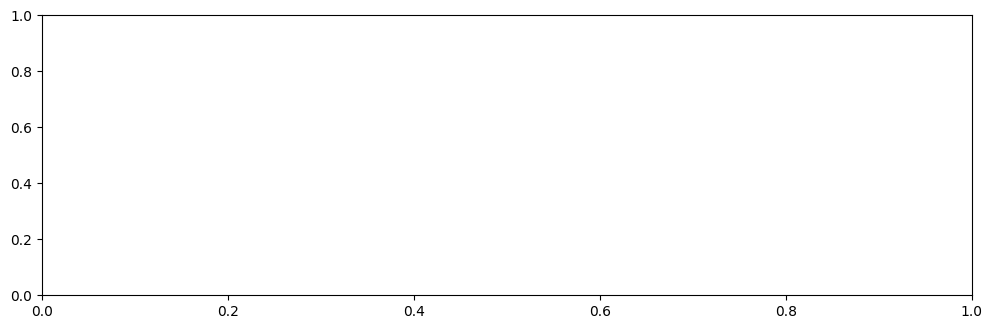

In [119]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an audio file
audio_path = librosa.example('trumpet')  # You can replace this with your audio file path
y, sr = librosa.load(audio_path)

# Compute PLP
plp = librosa.beat.plp(y=y, sr=sr)

# Plot the PLP
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.power_to_db(plp, ref=np.max),
                         y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('PLP')

# Plot the waveform
plt.subplot(2, 1, 2)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')

plt.tight_layout()
plt.show()


In [139]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Function to load and preprocess the dataset
def load_and_preprocess_data():
    # Assume you have a list of file paths and corresponding labels
    meta = pd.read_csv("/Users/Licious/project/unipd/hda_dataset/meta/esc50.csv")

    file_paths = meta["filename"].to_list()
    labels = meta["target"].to_list()

    # Extract features for each audio file
    features = [extract_features(file_path) for file_path in file_paths]

    # Convert lists to numpy arrays
    features = np.array(features)
    labels = np.array(labels)

    return features, labels

num_classes = 50
# Load and preprocess the data
# dataset_path = "path/to/your/dataset"
print("Start Feature extraction")
features, labels = load_and_preprocess_data()
print("End Feature extraction")


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Reshape data for CNN input (add a channel dimension)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# CNN Model
model = models.Sequential()
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


Start Feature extraction


/Users/Licious/project/DataPlatform/pydev/lib/python3.9/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


End Feature extraction
Epoch 1/10
50/50 [==============================] - 1s 6ms/step - loss: 7.2523 - accuracy: 0.0275 - val_loss: 3.8694 - val_accuracy: 0.0350
Epoch 2/10
50/50 [==============================] - 0s 3ms/step - loss: 3.8602 - accuracy: 0.0388 - val_loss: 3.7893 - val_accuracy: 0.0550
Epoch 3/10
50/50 [==============================] - 0s 3ms/step - loss: 3.8216 - accuracy: 0.0413 - val_loss: 3.7092 - val_accuracy: 0.0825
Epoch 4/10
50/50 [==============================] - 0s 3ms/step - loss: 3.6997 - accuracy: 0.0662 - val_loss: 3.5526 - val_accuracy: 0.1025
Epoch 5/10
50/50 [==============================] - 0s 3ms/step - loss: 3.6872 - accuracy: 0.0744 - val_loss: 3.5478 - val_accuracy: 0.0925
Epoch 6/10
50/50 [==============================] - 0s 3ms/step - loss: 3.5851 - accuracy: 0.0887 - val_loss: 3.4754 - val_accuracy: 0.1075
Epoch 7/10
50/50 [==============================] - 0s 3ms/step - loss: 3.5586 - accuracy: 0.0906 - val_loss: 3.3125 - val_accuracy: 0.13

In [140]:
!pip install visualkeras

328051.69s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Obtaining dependency information for aggdraw>=1.3.11 from https://files.pythonhosted.org/packages/57/6d/c9d9f67a4e6bc80c37439d80c7be05a4d60422433166ef9de43af715cd4a/aggdraw-1.3.18-cp39-cp39-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [142]:
import visualkeras
visualkeras.layered_view(model,legend=True, draw_volume=True)

TypeError: 'int' object is not iterable

In [149]:
tf.keras.utils.plot_model(model, to_file='signModel.png')

# from IPython.display import Image
# Image("signModel.png")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [151]:
!brew install graphviz

328429.50s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Running `brew update --auto-update`...
==> Downloading https://ghcr.io/v2/homebrew/portable-ruby/portable-ruby/blobs/sha256:d783cbeb6e6ef0d71c0b442317b54554370decd6fac66bf2d4938c07a63f67be
######################################################################### 100.0%
==> Pouring portable-ruby-3.1.4.arm64_big_sur.bottle.tar.gz
==> Auto-updated Homebrew!
==> Updated Homebrew from 942e77d3a to 4.1.24 (c32bd1c7c).
Updated 5 taps (caskroom/versions, brewsci/bio, scalacenter/bloop, homebrew/core and homebrew/cask).
==> New Formulae
argc                                     python-hatch-fancy-pypi-readme
cidr                                     python-hatch-vcs
dalfox                                   python-idna
doppler                                  python-jmespath
drogon                                   python-json5
glbinding@2                              python-magic
goresym                                  python-markdown-it-py
libconfini                               python-mdurl
l